In [54]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [55]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [56]:
data = pd.read_csv(csv_path)
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [57]:
data = data[5::6]
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [58]:
data.index = pd.to_datetime(data["Date Time"], format = '%d.%m.%Y %H:%M:%S')
data[:12]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


# Univariate
make data supervised (converting a foracasting problem to a supervised)

<AxesSubplot: xlabel='Date Time'>

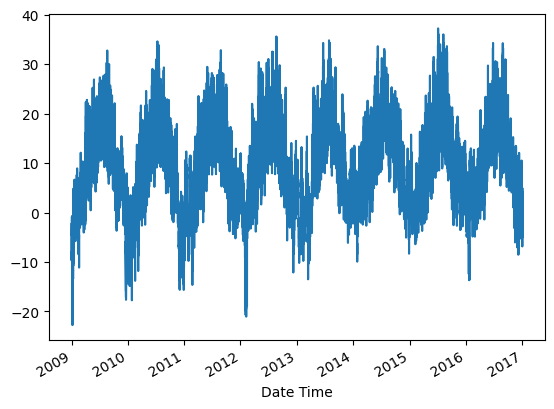

In [59]:
temp = data["T (degC)"]
temp.plot()

In [60]:
# [[[1], [2], [3], [4], [5]]] [6]   [[x]] [y]
# [[[2], [3], [4], [5], [6]]] [7]   [[x]] [y]

def df_to_x_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [61]:
WINDOW_SIZE = 5
x, y = df_to_x_y(temp, WINDOW_SIZE)
print(x.shape, y.shape)

(70086, 5, 1) (70086,)


In [62]:
# split data into train, validation and test

x_train, y_train = x[:60000], y[:60000]
x_val, y_val = x[60000:65000], y[60000:65000]
x_test, y_test = x[65000:], y[65000:]
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(60000, 5, 1) (60000,) (5000, 5, 1) (5000,) (5086, 5, 1) (5086,)


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()

model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, "relu"))
model1.add(Dense(1, "linear"))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [64]:
cp = ModelCheckpoint("model1/", save_best_only = True)
model1.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [65]:
model1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, callbacks = [cp])

Epoch 1/10
1866/1875 [============================>.] - ETA: 0s - loss: 80.4388 - root_mean_squared_error: 8.9688

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 14s 6ms/step - loss: 80.1764 - root_mean_squared_error: 8.9541 - val_loss: 5.3903 - val_root_mean_squared_error: 2.3217
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 9.0927 - root_mean_squared_error: 3.0154

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 9.0728 - root_mean_squared_error: 3.0121 - val_loss: 0.8995 - val_root_mean_squared_error: 0.9484
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 1.9722 - root_mean_squared_error: 1.4043

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 1.9713 - root_mean_squared_error: 1.4040 - val_loss: 0.6190 - val_root_mean_squared_error: 0.7868
Epoch 4/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.9646 - root_mean_squared_error: 0.9822

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.9644 - root_mean_squared_error: 0.9820 - val_loss: 0.5429 - val_root_mean_squared_error: 0.7368
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.7435 - root_mean_squared_error: 0.8623

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.7431 - root_mean_squared_error: 0.8620 - val_loss: 0.5284 - val_root_mean_squared_error: 0.7269
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6819 - root_mean_squared_error: 0.8258 - val_loss: 0.5423 - val_root_mean_squared_error: 0.7364
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6610 - root_mean_squared_error: 0.8130

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6612 - root_mean_squared_error: 0.8132 - val_loss: 0.5015 - val_root_mean_squared_error: 0.7082
Epoch 8/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6523 - root_mean_squared_error: 0.8077

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6522 - root_mean_squared_error: 0.8076 - val_loss: 0.4923 - val_root_mean_squared_error: 0.7016
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6466 - root_mean_squared_error: 0.8041 - val_loss: 0.5037 - val_root_mean_squared_error: 0.7097
Epoch 10/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6445 - root_mean_squared_error: 0.8028

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6439 - root_mean_squared_error: 0.8025 - val_loss: 0.4867 - val_root_mean_squared_error: 0.6977


In [66]:
from tensorflow.keras.models import load_model
model_1 = load_model("model1/")

In [67]:
train_predictions = model_1.predict(x_train).flatten()
train_results = pd.DataFrame(data = {"Train Predictions" : train_predictions, "Actuals" : y_train})
train_results

1875/1875 [==============================] - 4s 2ms/step


,Train Predictions,Actuals
0,-9.903900,-9.67
1,-9.661753,-9.17
2,-8.772074,-8.10
3,-7.295777,-7.66
4,-7.178230,-7.04
...,...,...
59995,6.298147,6.07
59996,7.302809,9.88
59997,12.096709,13.53
59998,15.917591,15.43


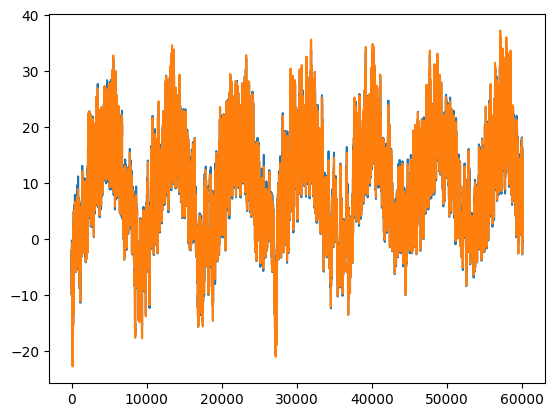

In [68]:
import matplotlib.pyplot as plt
plt.plot(train_results["Train Predictions"])
plt.plot(train_results["Actuals"])

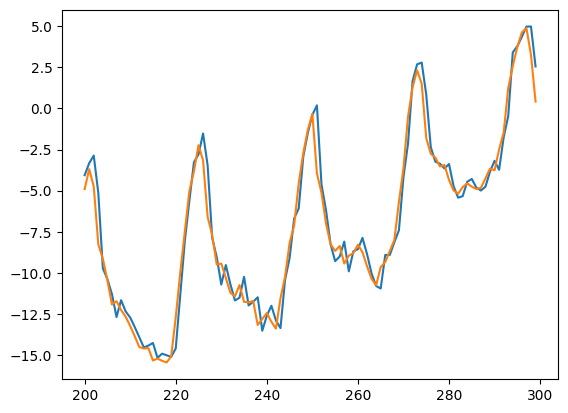

In [69]:
plt.plot(train_results["Train Predictions"][200:300])
plt.plot(train_results["Actuals"][200:300])

In [70]:
val_predictions = model_1.predict(x_val).flatten()
val_results = pd.DataFrame(data = {"Val Predictions" : val_predictions, "Actuals" : y_val})
val_results

157/157 [==============================] - 1s 2ms/step


,Val Predictions,Actuals
0,15.472872,14.02
1,13.206808,13.67
2,13.012537,12.27
3,11.552157,11.19
4,10.471594,10.85
...,...,...
4995,17.354082,18.27
4996,17.384151,17.85
4997,17.293591,16.65
4998,15.823665,15.85


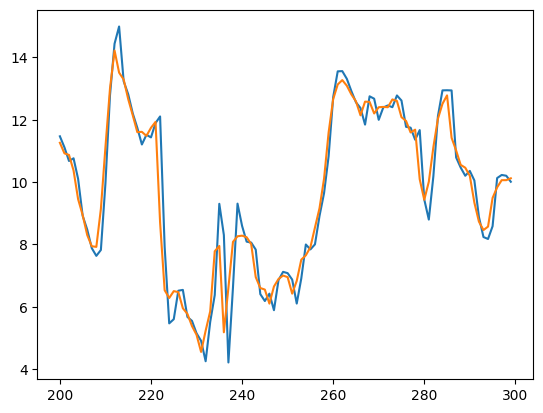

In [71]:
plt.plot(val_results["Val Predictions"][200:300])
plt.plot(val_results["Actuals"][200:300])

In [72]:
test_predictions = model_1.predict(x_test).flatten()
test_results = pd.DataFrame(data = {"Test Predictions" : test_predictions, "Actuals" : y_test})
test_results

159/159 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,14.395132,13.99
1,13.255885,13.46
2,12.902228,12.93
3,12.511604,12.43
4,12.062855,12.17
...,...,...
5081,-1.082592,-0.98
5082,-1.501184,-1.40
5083,-1.611191,-2.75
5084,-3.106211,-2.89


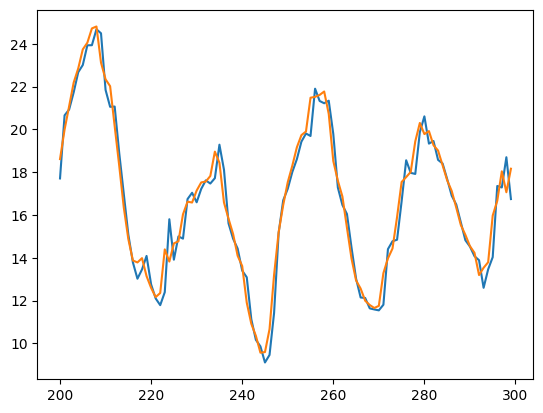

In [73]:
plt.plot(test_results["Test Predictions"][200:300])
plt.plot(test_results["Actuals"][200:300])

In [74]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions(model, x, y, start = 0, end = 100):
    predictions = model.predict(x).flatten()
    df = pd.DataFrame(data = {"Predictions" : predictions, "Actuals" : y})
    plt.plot(df["Predictions"][start:end])
    plt.plot(df["Actuals"][start:end])
    return df, mse(y, predictions)

159/159 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       14.395132    13.99
 1       13.255885    13.46
 2       12.902228    12.93
 3       12.511604    12.43
 4       12.062855    12.17
 ...           ...      ...
 5081    -1.082592    -0.98
 5082    -1.501184    -1.40
 5083    -1.611191    -2.75
 5084    -3.106211    -2.89
 5085    -3.077680    -3.93
 
 [5086 rows x 2 columns],
 0.6204716947637898)

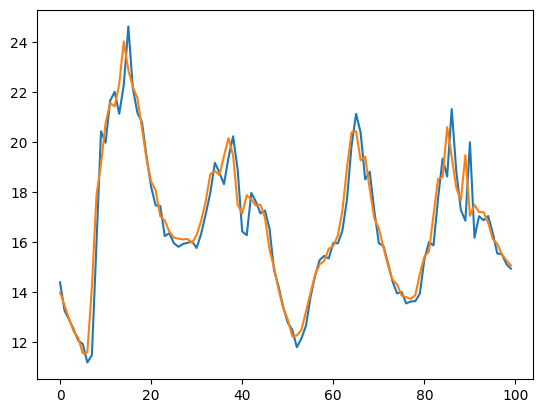

In [75]:
plot_predictions(model_1, x_test, y_test)

# CNN 1D

In [76]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size = 2))
model2.add(Flatten())
model2.add(Dense(8, "relu"))
model2.add(Dense(1, "linear"))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 8)                 2056      
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [77]:
cp2 = ModelCheckpoint("model2/", save_best_only = True)
model2.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [78]:
model2.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, callbacks = [cp2])

Epoch 1/10
1858/1875 [============================>.] - ETA: 0s - loss: 16.8792 - root_mean_squared_error: 4.1084

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 16.7366 - root_mean_squared_error: 4.0910 - val_loss: 1.0786 - val_root_mean_squared_error: 1.0386
Epoch 2/10
1855/1875 [============================>.] - ETA: 0s - loss: 1.1973 - root_mean_squared_error: 1.0942

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 1.1971 - root_mean_squared_error: 1.0941 - val_loss: 0.8064 - val_root_mean_squared_error: 0.8980
Epoch 3/10
1836/1875 [============================>.] - ETA: 0s - loss: 0.9372 - root_mean_squared_error: 0.9681

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.9351 - root_mean_squared_error: 0.9670 - val_loss: 0.6408 - val_root_mean_squared_error: 0.8005
Epoch 4/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.8039 - root_mean_squared_error: 0.8966

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.8038 - root_mean_squared_error: 0.8965 - val_loss: 0.6050 - val_root_mean_squared_error: 0.7778
Epoch 5/10
1854/1875 [============================>.] - ETA: 0s - loss: 0.7607 - root_mean_squared_error: 0.8722

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.7624 - root_mean_squared_error: 0.8732 - val_loss: 0.5637 - val_root_mean_squared_error: 0.7508
Epoch 6/10
1875/1875 [==============================] - ETA: 0s - loss: 0.7414 - root_mean_squared_error: 0.8611

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.7414 - root_mean_squared_error: 0.8611 - val_loss: 0.5498 - val_root_mean_squared_error: 0.7415
Epoch 7/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.7279 - root_mean_squared_error: 0.8532

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7282 - root_mean_squared_error: 0.8533 - val_loss: 0.5471 - val_root_mean_squared_error: 0.7397
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7218 - root_mean_squared_error: 0.8496 - val_loss: 0.5545 - val_root_mean_squared_error: 0.7446
Epoch 9/10
1844/1875 [============================>.] - ETA: 0s - loss: 0.7193 - root_mean_squared_error: 0.8481

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.7185 - root_mean_squared_error: 0.8476 - val_loss: 0.5360 - val_root_mean_squared_error: 0.7321
Epoch 10/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.7112 - root_mean_squared_error: 0.8433

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.7118 - root_mean_squared_error: 0.8437 - val_loss: 0.5321 - val_root_mean_squared_error: 0.7294


159/159 [==============================] - 0s 2ms/step


(      Predictions  Actuals
 0       14.241706    13.99
 1       13.078335    13.46
 2       12.766290    12.93
 3       12.344251    12.43
 4       11.920774    12.17
 ...           ...      ...
 5081    -1.757499    -0.98
 5082    -1.599597    -1.40
 5083    -2.126029    -2.75
 5084    -4.218968    -2.89
 5085    -3.186437    -3.93
 
 [5086 rows x 2 columns],
 0.7395586572443205)

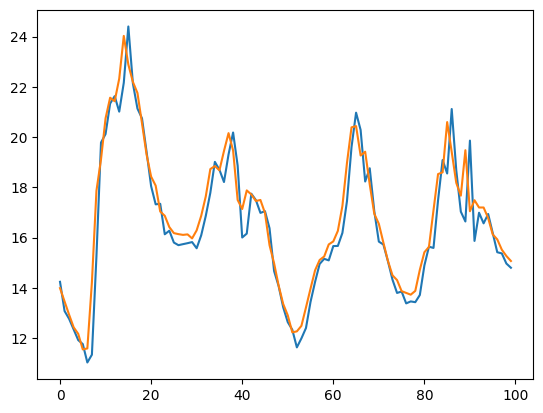

In [79]:
plot_predictions(model2, x_test, y_test)

# GRU

In [80]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, "relu"))
model3.add(Dense(1, "linear"))

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [81]:
cp3 = ModelCheckpoint("model3/", save_best_only = True)
model3.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [82]:
model3.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, callbacks = [cp3])

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 32.8736 - root_mean_squared_error: 5.7336

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 32.7450 - root_mean_squared_error: 5.7223 - val_loss: 0.9446 - val_root_mean_squared_error: 0.9719
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 1.5140 - root_mean_squared_error: 1.2304

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 10s 6ms/step - loss: 1.5118 - root_mean_squared_error: 1.2295 - val_loss: 0.6225 - val_root_mean_squared_error: 0.7890
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.8449 - root_mean_squared_error: 0.9192

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.8446 - root_mean_squared_error: 0.9190 - val_loss: 0.5425 - val_root_mean_squared_error: 0.7366
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.7089 - root_mean_squared_error: 0.8419

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 12s 7ms/step - loss: 0.7087 - root_mean_squared_error: 0.8419 - val_loss: 0.5116 - val_root_mean_squared_error: 0.7152
Epoch 5/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.6693 - root_mean_squared_error: 0.8181

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.6694 - root_mean_squared_error: 0.8182 - val_loss: 0.4994 - val_root_mean_squared_error: 0.7067
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.6565 - root_mean_squared_error: 0.8103 - val_loss: 0.5168 - val_root_mean_squared_error: 0.7189
Epoch 7/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6494 - root_mean_squared_error: 0.8058

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 12s 7ms/step - loss: 0.6496 - root_mean_squared_error: 0.8060 - val_loss: 0.4954 - val_root_mean_squared_error: 0.7039
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6457 - root_mean_squared_error: 0.8036

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6457 - root_mean_squared_error: 0.8036 - val_loss: 0.4936 - val_root_mean_squared_error: 0.7025
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6432 - root_mean_squared_error: 0.8020 - val_loss: 0.4947 - val_root_mean_squared_error: 0.7033
Epoch 10/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6419 - root_mean_squared_error: 0.8012

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6415 - root_mean_squared_error: 0.8009 - val_loss: 0.4899 - val_root_mean_squared_error: 0.6999


159/159 [==============================] - 1s 3ms/step


(      Predictions  Actuals
 0       14.361781    13.99
 1       13.193990    13.46
 2       12.886567    12.93
 3       12.467837    12.43
 4       12.031499    12.17
 ...           ...      ...
 5081    -0.962736    -0.98
 5082    -1.374129    -1.40
 5083    -1.711565    -2.75
 5084    -3.274155    -2.89
 5085    -3.047445    -3.93
 
 [5086 rows x 2 columns],
 0.6195043443101527)

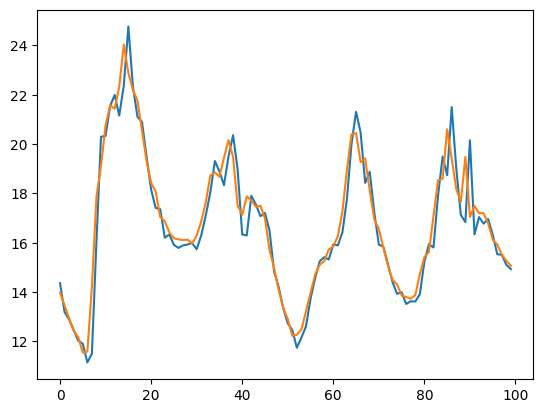

In [83]:
plot_predictions(model3, x_test, y_test)

# Multivariate

In [84]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [85]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [86]:
temp_df = temp_df.drop("Seconds", axis = 1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [87]:
# [[[t1, ds1], [t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5]]] [t6]   [[x]] [y]
# [[[t2], [t3], [t4], [t5], [t6]]] [t7]   [[x]] [y]
def df_to_x_y2(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [88]:
x2, y2 = df_to_x_y2(temp_df)
x2.shape, y2.shape

((70085, 6, 5), (70085,))

In [89]:
x2_train, y2_train = x2[:60000], y2[:60000]
x2_val, y2_val = x2[60000:65000], y2[60000:65000]
x2_test, y2_test = x2[65000:], y2[65000:]
x2_train.shape, y2_train.shape, x2_val.shape, y2_val.shape, x2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [90]:
# Scale temperature
temp_training_mean = np.mean(x2_train[:, :, 0]) #(all samples, all time stamps, first feature(temperature))
temp_training_std = np.std(x2_train[:, :, 0])

def preprocess(x):
    x[:, :, 0] = (x[:, :, 0] - temp_training_mean) / temp_training_std
    return x

In [91]:
preprocess(x2_train)
preprocess(x2_val)
preprocess(x2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [92]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, "relu"))
model4.add(Dense(1, "linear"))

model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                17920     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [93]:
cp4 = ModelCheckpoint("model4/", save_best_only = True)
model4.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [94]:
model4.fit(x2_train, y2_train, validation_data = (x2_val, y2_val), epochs = 10, callbacks = [cp4])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 48.2888 - root_mean_squared_error: 6.9490

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 22s 11ms/step - loss: 48.2888 - root_mean_squared_error: 6.9490 - val_loss: 4.6098 - val_root_mean_squared_error: 2.1470
Epoch 2/10
1868/1875 [============================>.] - ETA: 0s - loss: 5.3323 - root_mean_squared_error: 2.3092

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 5.3223 - root_mean_squared_error: 2.3070 - val_loss: 1.9750 - val_root_mean_squared_error: 1.4053
Epoch 3/10
1866/1875 [============================>.] - ETA: 0s - loss: 2.0136 - root_mean_squared_error: 1.4190

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 2.0093 - root_mean_squared_error: 1.4175 - val_loss: 0.9713 - val_root_mean_squared_error: 0.9855
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 1.0800 - root_mean_squared_error: 1.0392

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 1.0807 - root_mean_squared_error: 1.0396 - val_loss: 0.7156 - val_root_mean_squared_error: 0.8459
Epoch 5/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.8115 - root_mean_squared_error: 0.9008

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.8108 - root_mean_squared_error: 0.9004 - val_loss: 0.5792 - val_root_mean_squared_error: 0.7610
Epoch 6/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6650 - root_mean_squared_error: 0.8155

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6650 - root_mean_squared_error: 0.8155 - val_loss: 0.4806 - val_root_mean_squared_error: 0.6933
Epoch 7/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.5934 - root_mean_squared_error: 0.7703

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5955 - root_mean_squared_error: 0.7717 - val_loss: 0.4483 - val_root_mean_squared_error: 0.6696
Epoch 8/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.5610 - root_mean_squared_error: 0.7490

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5611 - root_mean_squared_error: 0.7491 - val_loss: 0.4275 - val_root_mean_squared_error: 0.6539
Epoch 9/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.5479 - root_mean_squared_error: 0.7402

INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5477 - root_mean_squared_error: 0.7401 - val_loss: 0.4226 - val_root_mean_squared_error: 0.6501
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5387 - root_mean_squared_error: 0.7340 - val_loss: 0.4301 - val_root_mean_squared_error: 0.6558


159/159 [==============================] - 1s 2ms/step


(      Predictions  Actuals
 0       13.045099    13.46
 1       12.633108    12.93
 2       12.188368    12.43
 3       11.867666    12.17
 4       11.990443    11.55
 ...           ...      ...
 5080    -1.026897    -0.98
 5081    -1.375042    -1.40
 5082    -1.684625    -2.75
 5083    -3.010780    -2.89
 5084    -3.062804    -3.93
 
 [5085 rows x 2 columns],
 0.5215605889598881)

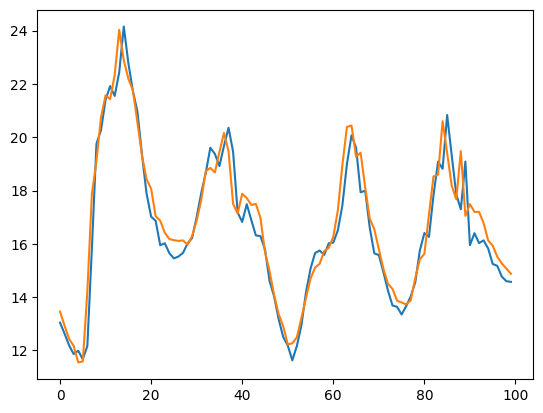

In [95]:
plot_predictions(model4, x2_test, y2_test)

# Multi in multi out

In [122]:
p_temp_df = pd.concat([data["p (mbar)"], temp_df], axis = 1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [123]:
def df_to_x_y3(df, window_size = 7):
    df_as_np = df.to_numpy()
    x = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i + window_size]]
        x.append(row)
        label = [df_as_np[i + window_size][0], df_as_np[i + window_size][1]]
        y.append(label)
    return np.array(x), np.array(y)

In [124]:
x3, y3 = df_to_x_y3(p_temp_df)
x3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [125]:
x3_train, y3_train = x3[:60000], y3[:60000]
x3_val, y3_val = x3[60000:65000], y3[60000:65000]
x3_test, y3_test = x3[65000:], y3[65000:]
x3_train.shape, y3_train.shape, x3_val.shape, y3_val.shape, x3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [126]:
#scaling
p_training_mean3 = np.mean(x3_train[:, :, 0])
p_training_std3 = np.std(x3_train[:, :, 0])

temp_training_mean3 = np.mean(x3_train[:, :, 1])
temp_training_std3 = np.std(x3_train[:, :, 1])

def preprocess3(x):
    x[:, :, 0] = (x[:, :, 0] - p_training_mean3) / p_training_std3
    x[:, :, 1] = (x[:, :, 1] - temp_training_mean3) / temp_training_std3
    return x

def preprocess_output(y):
    y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
    y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
    return y

In [127]:
preprocess3(x3_train)
preprocess3(x3_val)
preprocess3(x3_test)

array([[[-1.07355644e+00,  1.04009390e+00, -9.65925826e-01,
          2.58819045e-01,  5.22877889e-01, -8.52407598e-01],
        [-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        ...,
        [-8.80748054e-01,  6.66328883e-01, -2.58819045e-01,
          9.65925826e-01,  5.20431780e-01, -8.53903251e-01],
        [-8.29817537e-01,  5.37039098e-01, -7.16474371e-12,
          1.00000000e+00,  5.19819584e-01, -8.54276068e-01],
        [-8.01927015e-01,  4.74744929e-01,  2.58819045e-01,
          9.65925826e-01,  5.19207120e-01, -8.54648446e-01]],

       [[-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        [-9.14701

In [128]:
preprocess_output(y3_train)
preprocess_output(y3_val)
preprocess_output(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [129]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, "relu"))
model5.add(Dense(2, "linear"))

model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                18176     
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [130]:
cp5 = ModelCheckpoint("model5/", save_best_only = True)
model5.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [131]:
model5.fit(x3_train, y3_train, validation_data = (x3_val, y3_val), epochs = 10, callbacks = [cp5])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.1501 - root_mean_squared_error: 0.3874

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 22s 11ms/step - loss: 0.1501 - root_mean_squared_error: 0.3874 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1762
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0237 - root_mean_squared_error: 0.1541

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.0237 - root_mean_squared_error: 0.1541 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1246
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.1102

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 0.0121 - root_mean_squared_error: 0.1101 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0913
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.0902

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 39s 21ms/step - loss: 0.0081 - root_mean_squared_error: 0.0902 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0780
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.0815

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 33s 17ms/step - loss: 0.0066 - root_mean_squared_error: 0.0815 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0708
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0764

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 28s 15ms/step - loss: 0.0058 - root_mean_squared_error: 0.0764 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0669
Epoch 7/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0733

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 33s 18ms/step - loss: 0.0054 - root_mean_squared_error: 0.0733 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641
Epoch 8/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0718

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.0052 - root_mean_squared_error: 0.0718 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0628
Epoch 9/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0709

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 0.0050 - root_mean_squared_error: 0.0709 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0615
Epoch 10/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0703

INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 34s 18ms/step - loss: 0.0049 - root_mean_squared_error: 0.0703 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0609


In [132]:
def plot_predictions2(model, x, y, start = 0, end = 100):
    predictions = model.predict(x)
    p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
    p_actuals, temp_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data = {"Temperature Predictions" : temp_preds,
                                "Temperature Actuals" : temp_actuals,
                                "Pressure Predictions" : p_preds,
                                "Pressure Actuals" : p_actuals
                                })
    plt.plot(df["Temperature Predictions"][start:end])
    plt.plot(df["Temperature Actuals"][start:end])
    plt.plot(df["Pressure Predictions"][start:end])
    plt.plot(df["Pressure Actuals"][start:end])
    return df[start:end]

159/159 [==============================] - 1s 4ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.393415,0.412451,-0.776627,-0.793439
1,0.345778,0.353683,-0.764041,-0.763123
2,0.304421,0.323123,-0.729798,-0.721893
3,0.302810,0.250251,-0.680838,-0.652773
4,0.257584,0.254952,-0.595002,-0.652773
...,...,...,...,...
95,0.685516,0.716869,-0.405068,-0.416310
96,0.643362,0.687485,-0.403498,-0.399333
97,0.625065,0.663978,-0.387374,-0.399333
98,0.621113,0.641646,-0.379484,-0.400546


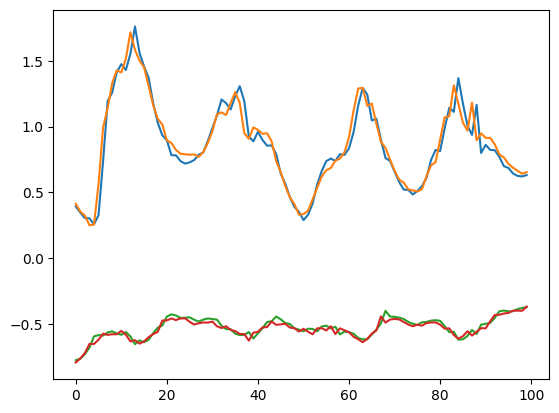

In [133]:
plot_predictions2(model5, x3_test, y3_test)

In [134]:
def postprocess_temp(arr):
    arr = (arr * temp_training_std3) + temp_training_mean3
    return arr

def postprocess_p(arr):
    arr = (arr * p_training_std3) + p_training_mean3
    return arr

In [135]:
def plot_predictions2(model, x, y, start = 0, end = 100):
    predictions = model.predict(x)
    p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
    p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
    df = pd.DataFrame(data = {"Temperature Predictions" : temp_preds,
                                "Temperature Actuals" : temp_actuals,
                                "Pressure Predictions" : p_preds,
                                "Pressure Actuals" : p_actuals
                                })
    plt.plot(df["Temperature Predictions"][start:end])
    plt.plot(df["Temperature Actuals"][start:end])
    plt.plot(df["Pressure Predictions"][start:end])
    plt.plot(df["Pressure Actuals"][start:end])
    return df[start:end]

159/159 [==============================] - 2s 11ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.768041,12.93,982.568665,982.43
1,12.362745,12.43,982.672485,982.68
2,12.010878,12.17,982.954834,983.02
3,11.997174,11.55,983.358582,983.59
4,11.612394,11.59,984.066467,983.59
...,...,...,...,...
95,15.253242,15.52,985.632751,985.54
96,14.894601,15.27,985.645691,985.68
97,14.738930,15.07,985.778625,985.68
98,14.705301,14.88,985.843689,985.67


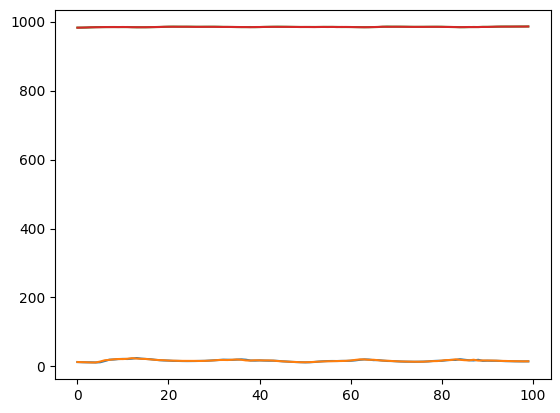

In [136]:
post_processed_df = plot_predictions2(model5, x3_test, y3_test)
post_processed_df

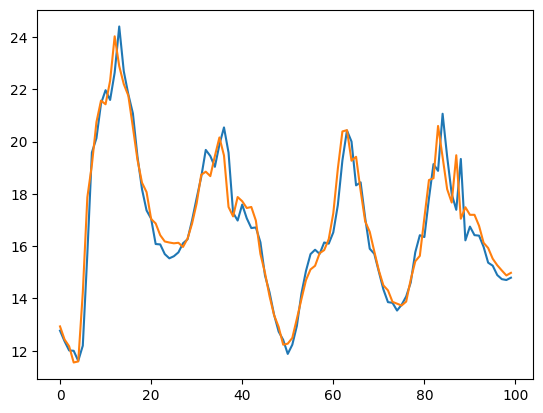

In [137]:
start, end = 0, 100
plt.plot(post_processed_df["Temperature Predictions"][start:end])
plt.plot(post_processed_df["Temperature Actuals"][start:end])

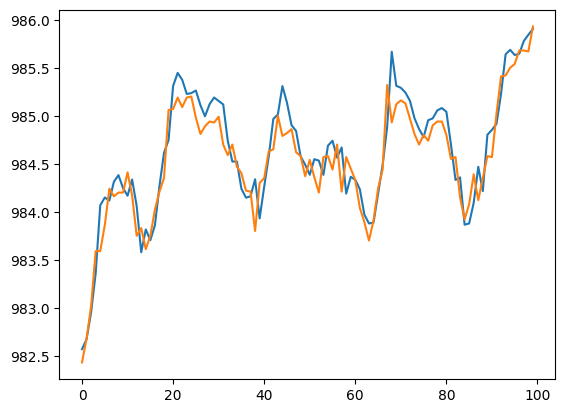

In [138]:
plt.plot(post_processed_df["Pressure Predictions"][start:end])
plt.plot(post_processed_df["Pressure Actuals"][start:end])

In [139]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences = True))
model6.add(LSTM(64))
model6.add(Dense(8, "relu"))
model6.add(Dense(2, "linear"))

model6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_6 (LSTM)               (None, 64)                24832     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [140]:
cp6 = ModelCheckpoint("model6/", save_best_only = True)
model6.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [141]:
model6.fit(x3_train, y3_train, validation_data = (x3_val, y3_val), epochs = 10, callbacks = [cp6])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1505 - root_mean_squared_error: 0.3879

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 90s 43ms/step - loss: 0.1505 - root_mean_squared_error: 0.3879 - val_loss: 0.0429 - val_root_mean_squared_error: 0.2070
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0331 - root_mean_squared_error: 0.1819

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 51s 27ms/step - loss: 0.0331 - root_mean_squared_error: 0.1819 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1576
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0190 - root_mean_squared_error: 0.1377

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 49s 26ms/step - loss: 0.0190 - root_mean_squared_error: 0.1377 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.1085

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 48s 26ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0940
Epoch 5/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.0931

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 45s 24ms/step - loss: 0.0087 - root_mean_squared_error: 0.0931 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0826
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.0843

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 39s 21ms/step - loss: 0.0071 - root_mean_squared_error: 0.0843 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0741
Epoch 7/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0784

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 48s 26ms/step - loss: 0.0061 - root_mean_squared_error: 0.0784 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0684
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0057 - root_mean_squared_error: 0.0756 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0701
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0741

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 45s 24ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
Epoch 10/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0731

INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 35s 19ms/step - loss: 0.0053 - root_mean_squared_error: 0.0731 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0649


# Conv1D

In [142]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size = 2, activation = "relu"))
model7.add(Flatten())
model7.add(Dense(8, "relu"))
model7.add(Dense(2, "linear"))

print(model7.summary())

cp7 = ModelCheckpoint("model7/", save_best_only = True)
model7.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

model7.fit(x3_train, y3_train, validation_data = (x3_val, y3_val), epochs = 10, callbacks = [cp7])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_2 (Flatten)         (None, 384)               0         
                                                                 
 dense_20 (Dense)            (None, 8)                 3080      
                                                                 
 dense_21 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,930
Trainable params: 3,930
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1841/1875 [============================>.] - ETA: 0s - loss: 0.2103 - root_mean_squared_error: 0.4586

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2071 - root_mean_squared_error: 0.4550 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 2/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0185 - root_mean_squared_error: 0.1360

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0185 - root_mean_squared_error: 0.1359 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1091
Epoch 3/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.0108 - root_mean_squared_error: 0.1041

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0108 - root_mean_squared_error: 0.1040 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0913
Epoch 4/10
1851/1875 [============================>.] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.0890

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - root_mean_squared_error: 0.0917 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0885
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.0852

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0073 - root_mean_squared_error: 0.0852 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0775
Epoch 6/10
1847/1875 [============================>.] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.0813

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.0066 - root_mean_squared_error: 0.0813 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0740
Epoch 7/10
1844/1875 [============================>.] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0788

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0062 - root_mean_squared_error: 0.0787 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 8/10
1856/1875 [============================>.] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0769

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0769 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0693
Epoch 9/10
1859/1875 [============================>.] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0757

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 3s 2ms/step - loss: 0.0057 - root_mean_squared_error: 0.0756 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 10/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0746

INFO:tensorflow:Assets written to: model7\assets


INFO:tensorflow:Assets written to: model7\assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0056 - root_mean_squared_error: 0.0745 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0675
